# A Whale off the Port(folio)

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.



In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

#defining a Debug_Toggle to turn Debugging Printing on/off
debugging_toggle = True

## Data Cleaning


In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

1. whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

2. algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's company.

3. sp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.

##Whale Returns

Read the Whale Portfolio daily returns and clean the data.



In [2]:
# Read all the CSV datasets to pandas DataFrames

df_returns_whale = pd.read_csv('whale_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_algo = pd.read_csv('algo_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_tsx = pd.read_csv('sp_tsx_history.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)

    
# get the shape of the different datasets

dflist = [df_returns_whale, df_returns_algo, df_returns_tsx]
str_dflist = ["Famous 'Whale' Investor's Portfolios", "In-house Trading Algorithms from Company", "S&P TSX 60 Index"]
        

In [3]:
# Reading whale returns

print(f"Printing Shapes of {str_dflist[0]}:\t{dflist[0].shape}") 

Printing Shapes of Famous 'Whale' Investor's Portfolios:	(1060, 4)


In [4]:
# Count nulls

print(f"Counting Null Values {str_dflist[0]}:\t{dflist[0].isnull().sum().sum()}")   

Counting Null Values Famous 'Whale' Investor's Portfolios:	4


In [5]:
# Drop nulls
dflist[0].dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
print(f"Printing Shapes of {str_dflist[1]}:\t{dflist[1].shape}") 

Printing Shapes of In-house Trading Algorithms from Company:	(1241, 2)


In [7]:
# Count nulls
print(f"Counting Null Values {str_dflist[1]}:\t{dflist[1].isnull().sum().sum()}")    

Counting Null Values In-house Trading Algorithms from Company:	6


In [8]:
# Drop nulls
dflist[1].dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

In [9]:
# Reading S&P TSX 60 Closing Prices
print(f"Printing Shapes of {str_dflist[2]}:\t{dflist[2].shape}") 

Printing Shapes of S&P TSX 60 Index:	(1818, 1)


In [10]:
# Check Data Types
print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")


Printing Dtypes of S&P TSX 60 Index:
Close    object
dtype: object


In [11]:
# Fix Data Types

#we do this by removing the "$" and "," characters from string
#then we typecase the the string o a float
dflist[2]["Close"] = [float((x.replace('$',"")).replace(',',"")) for x in dflist[2]["Close"]]

In [12]:
# Calculate Daily Returns
df_sptsx_change = dflist[2]["Close"].pct_change()

In [13]:
# Count nulls
print(f"Counting Null Values S&P TSX 60 Change:\t{df_sptsx_change.isnull().sum().sum()}")    

# Drop nulls    
df_sptsx_change.dropna(inplace=True)

Counting Null Values S&P TSX 60 Change:	1


## Combine Whale, Algorithmic, and S&P TSX 60 Returns


In [14]:
df_consolidated = pd.concat([dflist[0],dflist[1],df_sptsx_change], axis = 'columns', join = 'inner')
# Rename `Close` Column to be specific to this portfolio.
df_consolidated.rename(columns={'Close':'S&P TSX 60'},inplace=True)

## Conduct Quantitative Analysis

### Calculate and Plot the daily returns.


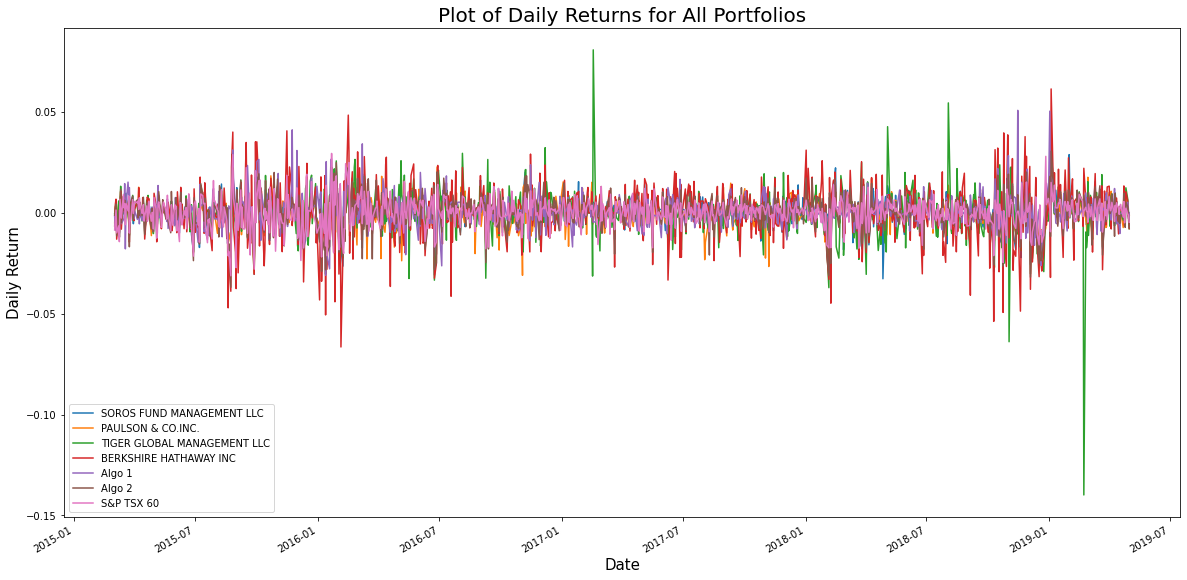

In [15]:
# Plot daily returns of all portfolios
df_consolidated.plot(figsize=(20,10))
plt.title('Plot of Daily Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(loc="lower left", fontsize=10)

### Calculate and Plot cumulative returns.


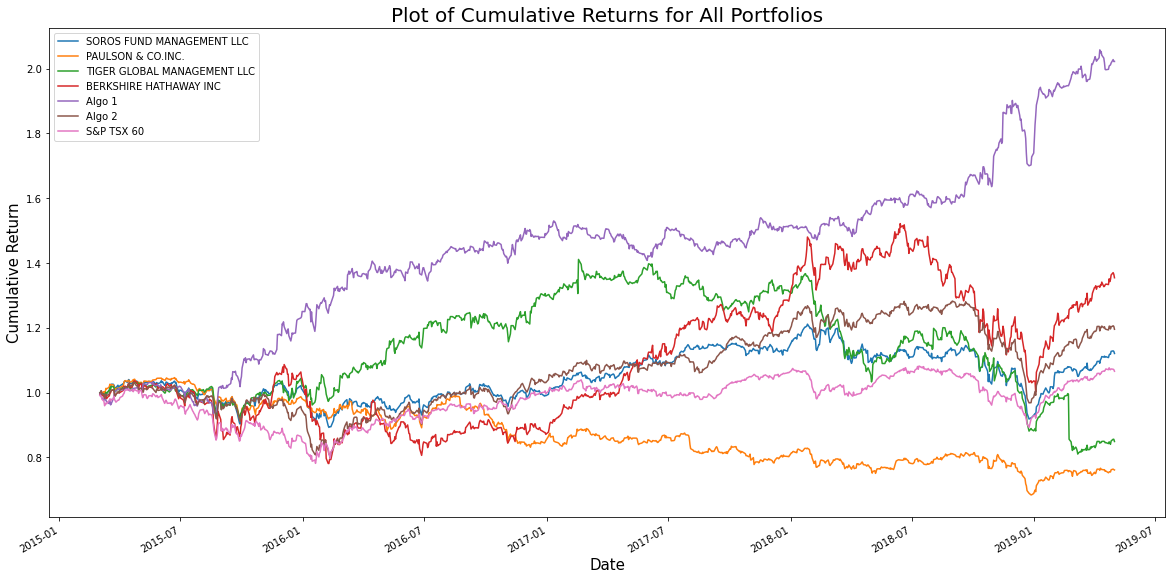

In [16]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
df_consolidated_cumulative_returns = (1 + df_consolidated).cumprod()
df_consolidated_cumulative_returns.plot(figsize=(20,10))
plt.title('Plot of Cumulative Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Return', fontsize=15)
plt.legend(loc="upper left", fontsize=10)

## Risk Analysis

Determine the risk of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios.
3. Determine which portfolios are riskier than the S&P TSX 60.
4. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


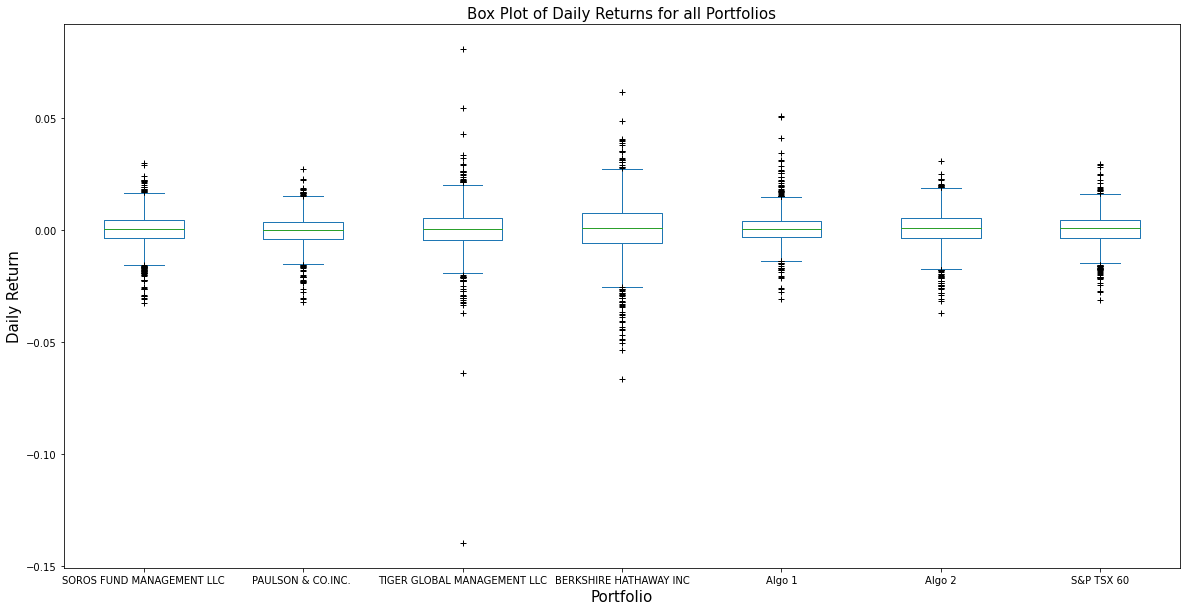

In [17]:
# Box plot to visually show risk


df_consolidated.plot.box(figsize=(20,10),sym='+')
plt.title('Box Plot of Daily Returns for all Portfolios', fontsize = 15)
plt.xlabel('Portfolio', fontsize = 15)
plt.ylabel('Daily Return', fontsize = 15)
plt.show()

### Calculate Standard Deviations


In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std_deviations = df_consolidated.std().sort_values(ascending=False)
print(f"The daily standard deviations of all portfolios is listed below: \n{daily_std_deviations}")

The daily standard deviations of all portfolios is listed below: 
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60


In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"The daily standard deviations of S&P TSX 60: {daily_std_deviations['S&P TSX 60']}")


# Determine which portfolios are riskier than the S&P TSX 60
print(f"\nThe below portfolios are riskier than the S&P TSX 60")
for portfolio in df_consolidated.columns:
    if daily_std_deviations[portfolio] > daily_std_deviations['S&P TSX 60']: 
        print(f"\t {portfolio}")

The daily standard deviations of S&P TSX 60: 0.007034167748577725

The below portfolios are riskier than the S&P TSX 60
	 SOROS FUND MANAGEMENT LLC
	 TIGER GLOBAL MANAGEMENT LLC
	 BERKSHIRE HATHAWAY INC
	 Algo 1
	 Algo 2


### Calculate the Annualized Standard Deviation


In [20]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std_deviations = daily_std_deviations*np.sqrt(252)
df_annualized_std_deviations.sort_values(ascending=False)

print(f"The annualized standard deviation (252 trading days): \n{df_annualized_std_deviations}")

The annualized standard deviation (252 trading days): 
BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

  1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
  2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
  3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling std for all portfolios with 21-day window

For Later Reference: Here we use the pandas.DataFrame.rolling



<AxesSubplot:xlabel='Date'>

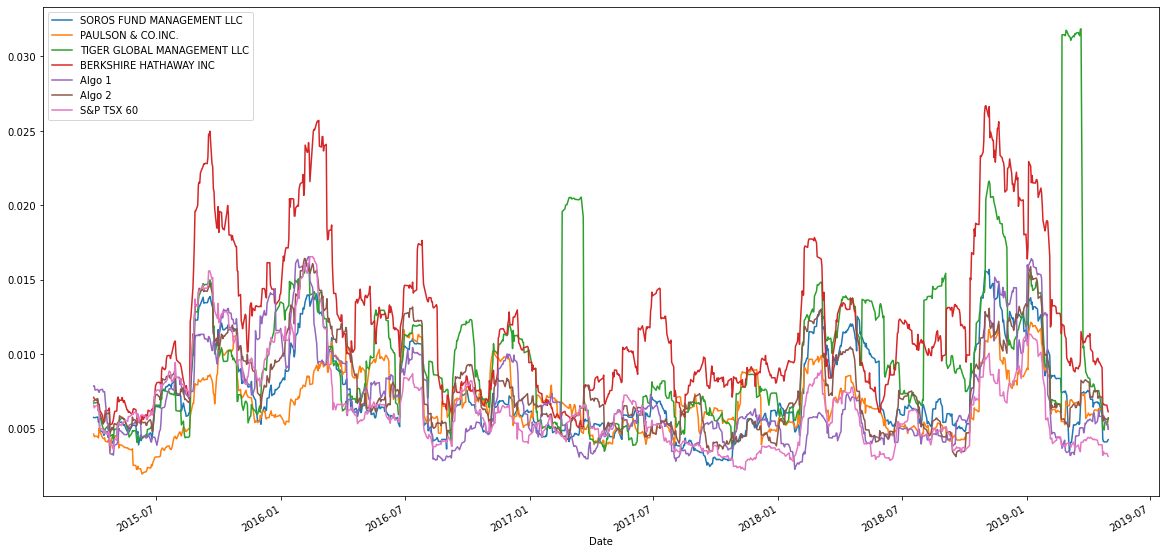

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling_21_day_std_deviations = df_consolidated.rolling(window=21).std()

# Plot the rolling standard deviation
df_rolling_21_day_std_deviations.plot(figsize=(20,10))


### Calculate and plot the correlation


In [22]:
# Calculate the correlation

df_correlation = df_consolidated.corr()

# Display the correlation matrix
print(f"The correlation matrix for the portfolios:\n")
df_correlation


The correlation matrix for the portfolios:



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


Text(0.5, 1.0, 'Correlation')

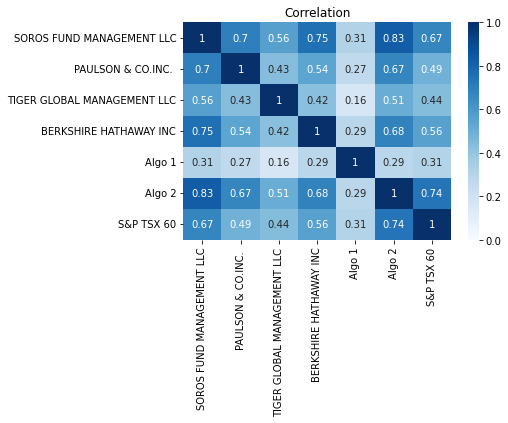

In [23]:
#show the heatmap
sns.heatmap(df_correlation, vmin=0, vmax=1, cmap="Blues", annot=True).set_title("Correlation")


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX


SOROS FUND MANAGEMENT LLC: 
		 0.00003710689907855223
PAULSON & CO.INC. : 
		 0.00002389491656361343
TIGER GLOBAL MANAGEMENT LLC: 
		 0.00003372724149435499
BERKSHIRE HATHAWAY INC: 
		 0.00005027336077110013
Algo 1: 
		 0.00001656300030891138
Algo 2: 
		 0.00004318704430084259
S&P TSX 60: 
		 0.00004947951591513095


<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Beta'}, xlabel='Date'>

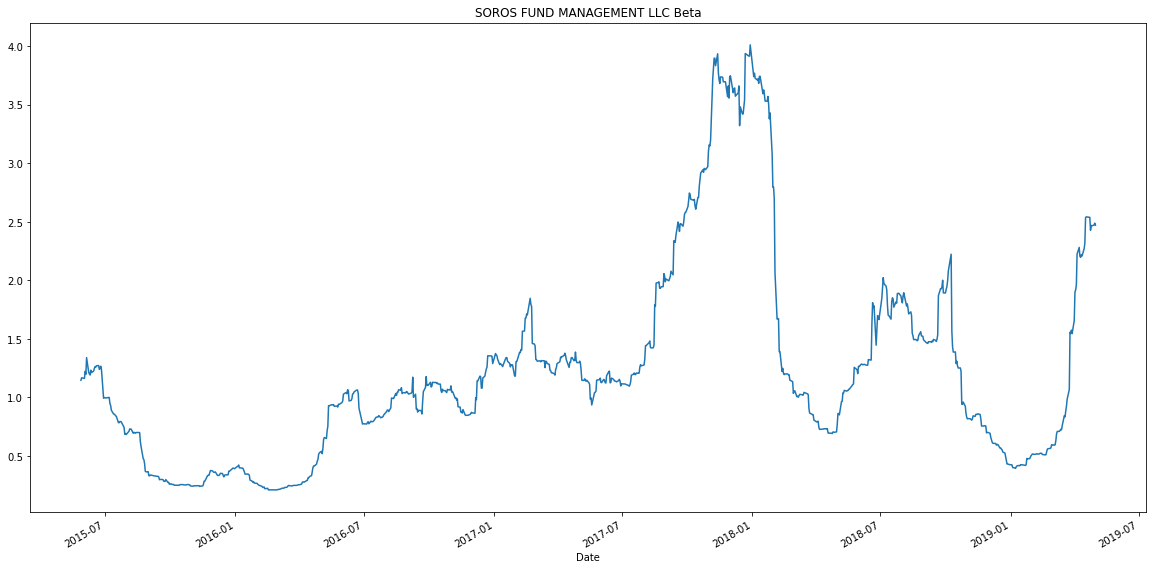

In [24]:
# Calculate covariance of all portfolio
df_covariances = []
for i in range(0,len(df_consolidated.columns)):
    df_covariances.append(df_consolidated[df_consolidated.columns[i]].cov(df_consolidated['S&P TSX 60']))

#Printing covariances
j = 0
for i in df_covariances:
    print(f"{df_consolidated.columns[j]}: \n\t\t {i:.20f}")
    j = j+ 1


# Calculate variance of S&P TSX
df_variance_sp_tsx_60 = df_consolidated['S&P TSX 60'].rolling(window=60).var()
# Computing beta for SOROS FUND MANAGEMENT LLC Beta
df_beta = df_covariances[0]/df_variance_sp_tsx_60
# Plot beta trend
df_beta.plot(title="SOROS FUND MANAGEMENT LLC Beta",figsize=(20, 10))

### Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average (21 Day Half life)'}, xlabel='Date'>

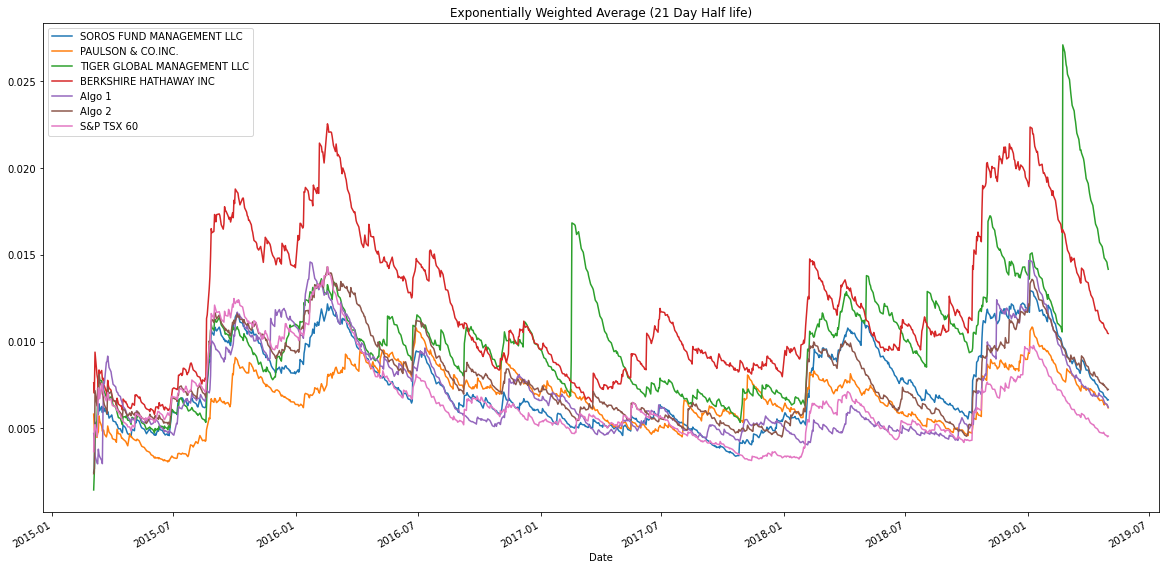

In [25]:
# Use `ewm` to calculate the rolling window
df_rolling_ewa = df_consolidated.ewm(halflife=21,adjust=True).std()
df_rolling_ewa.plot(title="Exponentially Weighted Average (21 Day Half life)", figsize=(20, 10))

## Sharpe Ratios

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot


In [26]:
# Annualized Sharpe Ratios
#Here we treat the risk-free return to be zero!
sharpe_ratios = ((df_consolidated.mean() - 0) * 252) / (df_consolidated.std() * np.sqrt(252))

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharp Ratios'}>

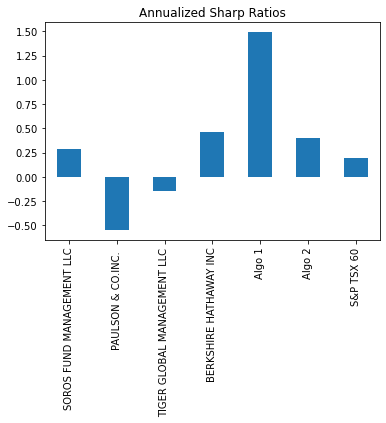

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Annualized Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


The Algorithmic strategy 1 was able to outperform the S&P TSX 60, all the whale portfolios and even the second algorithmic strategy. The second algorthmic strategy outperformed the S&P TSX and all of the whale portfolios besides Berkshire Hathaway's.

## Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

### Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.


In [28]:
# Reading data from 1st stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# goog_df is the variable used to represent the chosen dataframe stock company: Google
shop_df = pd.read_csv("shop_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.drop('Symbol',axis=1)
shop_df.head()   

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [29]:
# Reading data from 2nd stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# amd_df is the variable used to represent the chosen dataframe stock company: AMD
otex_df = pd.read_csv("otex_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df = otex_df.drop('Symbol',axis=1)
otex_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [30]:
#Reading data from 3rd stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# nvda_df is the variable used to represent the chosen dataframe stock company: NVIDIA
l_df = pd.read_csv("l_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df = l_df.drop('Symbol',axis=1)
l_df.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [31]:
# Combine all stocks in a single DataFrame
# The .concat() function is used to combined all 4 of the stocks dataframes, with the parameters set to axis = columns and join = inner which will combine
# all records together seamlessly
custom_df = pd.concat([shop_df, otex_df, l_df], axis="columns", join="inner")
custom_df

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [32]:
# Reset Date index, using the .index.normalize() function
custom_df.index = custom_df.index.normalize()
custom_df

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [33]:
# Reorganize portfolio data by having a column per symbol
# This is done by creating a list of the names we want the Columns to be and using the .columns() function to set the name as the lists'
columns = ["SHOP", "OTEX", "L"]
custom_df.columns = columns
custom_df.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [34]:
# Calculate daily returns
# .pct_change() returns a dataFrame with the percentage difference between each row and the previous
custom_daily_returns = custom_df.pct_change()
# Drop NAs, using the .dropna() function
custom_daily_returns.dropna(inplace=True)
# Display sample data using the .head() function
custom_daily_returns.head()


,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock


In [35]:
# Set weights, the weights are set to 1/3 as there are 3 stocks in this portfolio. This is stored in the weights variable
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# The .dot() function calculates the returns of each stock in relation to the weight which is set to 1/5
# .pct_change() returns a dataFrame with the percentage difference between each row and the previous
# .dropna() used to ensure there is no null/empty values
portfolio = custom_df.dot(weights)
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace = True)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

### Join your portfolio returns to the DataFrame that contains all of the portfolio returns


In [36]:
# Join your returns DataFrame to the original returns DataFrame
# The .concat() function is used to combined all 4 of the stocks dataframes, with the parameters set to axis = columns and join = inner which will combine
# all records together seamlessly
# .rename() is used to rename the custom portfolio to MARCUS INC
all_df = pd.concat((portfolio_returns,df_consolidated), axis = 'columns', join = 'inner')
all_df.rename(columns={0: "JD PORTFOLIO"}, inplace=True)
all_df.head()


,JD PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs), the .dropna() function is used
# .isna().sum() is used to verify all null values are removed
all_df.dropna(inplace=True)
all_df.isna().sum()

JD PORTFOLIO                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
dtype: int64

### Re-run the risk analysis with your portfolio to see how it compares to the others


#### Calculate the Annualized Standard Deviation


In [38]:
# Calculate the annualized `std`
all_annualized_std = all_df.std() * np.sqrt(252)
all_annualized_std

JD PORTFOLIO                   0.345776
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
dtype: float64

#### Calculate and plot rolling std with 21-day window


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

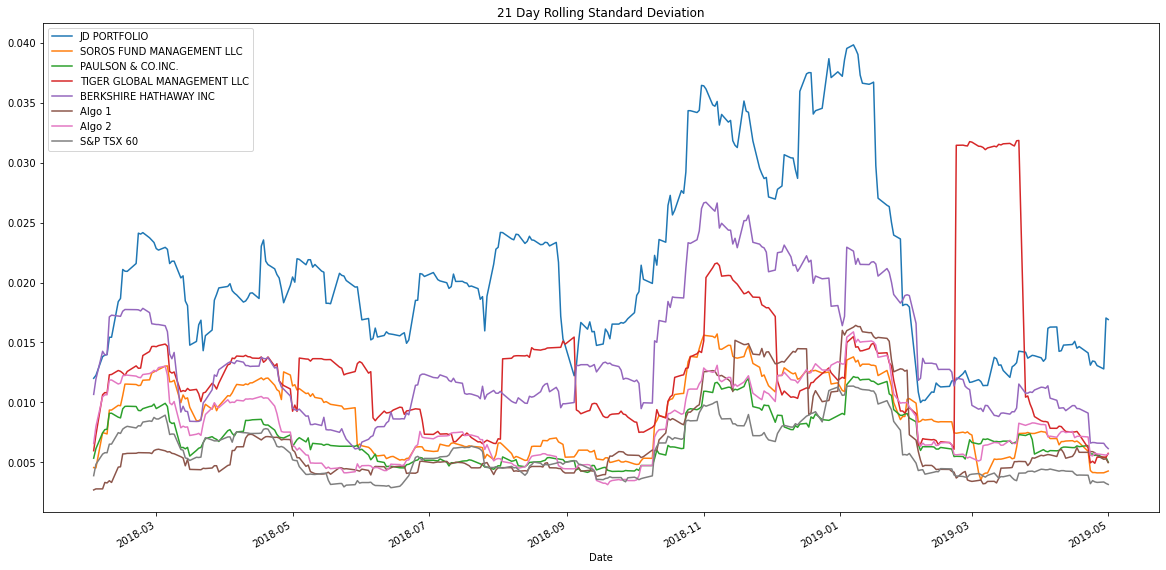

In [39]:
# Calculate rolling standard deviation, this is done by taking all the dataframes and using the .std() function in combination of .rolling() 
# to add the 21-day window parameter
all_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
# Plot rolling standard deviation, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.

#### Calculate and plot the correlation


In [40]:
# Calculate and plot the correlation
df_correlation = all_df.corr()

# Display the correlation matrix
print(f"The correlation matrix for the portfolios:\n")
df_correlation

The correlation matrix for the portfolios:



,JD PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
JD PORTFOLIO,1.000000,0.532091,0.346201,0.226895,0.650858,0.209165,0.535379,0.509428
SOROS FUND MANAGEMENT LLC,0.532091,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.346201,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.226895,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.650858,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.209165,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.535379,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
S&P TSX 60,0.509428,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


Text(0.5, 1.0, 'Correlation')

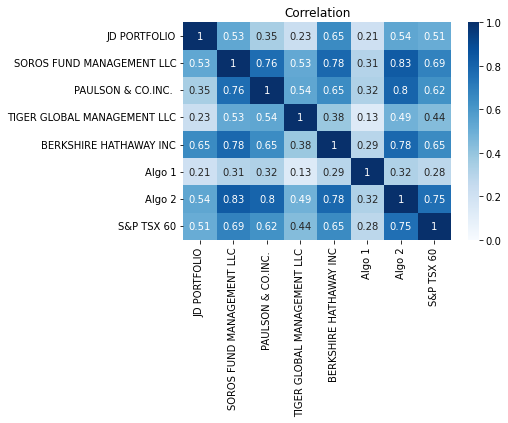

In [41]:
sns.heatmap(df_correlation, vmin=0, vmax=1, cmap="Blues", annot=True).set_title("Correlation")


<AxesSubplot:title={'center':'Rolling Beta of JD PROPERTIES'}, xlabel='Date'>

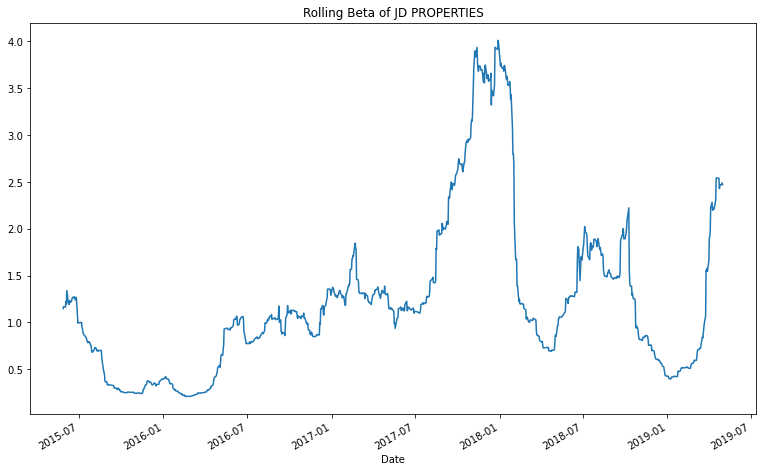

In [42]:
# Calculate and plot Beta, this section we use the same approach as in the previous section
joanna_covariance = all_df['JD PORTFOLIO'].rolling(window=60).cov(df_consolidated['S&P TSX 60'])

# Calculate variance of S&P TSX
variance = df_consolidated['S&P TSX 60'].rolling(window=60).var()
# Computing beta
joanna = joanna_covariance / variance
# Plot beta trend, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
df_beta.plot(title='Rolling Beta of JD PROPERTIES', figsize=(13,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot


In [43]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (all_df.mean() * 252) / (all_df.std() * np.sqrt(252))
sharpe_ratio

JD PORTFOLIO                   1.546162
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

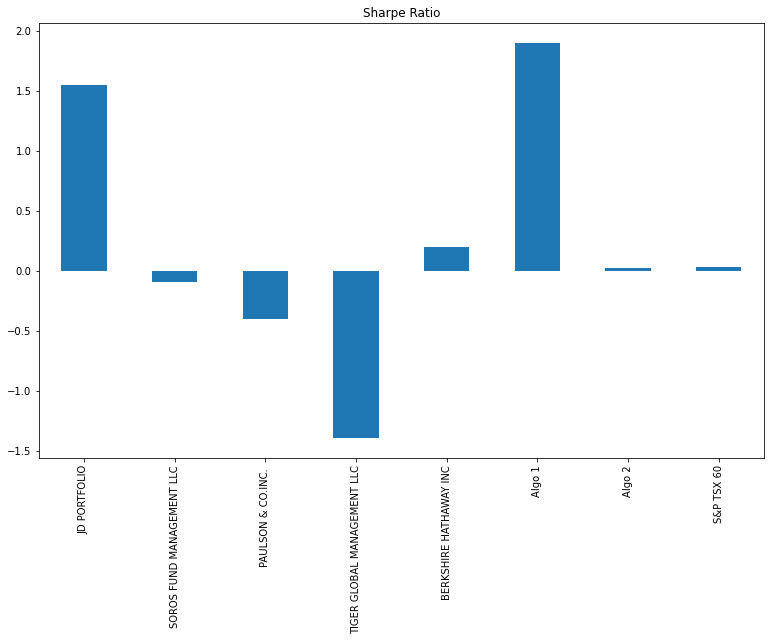

In [44]:
# Visualize the sharpe ratios as a bar plot, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
sharpe_ratio.plot(kind='bar', title='Sharpe Ratio', figsize=(13,8))


### How does your portfolio do?

Answer: Considering the sharpe ratio, JD PORTFOLIO performed quite well, with a sharpe ratio of 1.55.